## Topic Analysis and Word Frequency Visualization of Canadian Federal Liberal and Conservative Party Leaders' Tweets

David Dvorak

August 21, 2021

Here I visualize the results of the topic analysis using pyLDAvis. I am following the structure of the example at http://nbviewer.jupyter.org/github/bmabey/pyLDAvis/blob/master/notebooks/sklearn.ipynb  
which utilitzes the pyldavis package: https://github.com/bmabey/pyLDAvis
Note: Interactive graphics will not display on Github

In [69]:
from __future__ import print_function
import numpy as np
import pandas as pd
import re, nltk
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords as stopwords_set
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator 
import matplotlib.pyplot as plt 
from PIL import Image
from datetime import datetime as dt
timestamp = dt.now().strftime("%Y%m%d_%H-%M-%S")

In [7]:
# If the punkt package hasn't been previously downloaded, run this code:
# nltk.download('punkt')

## Load tweet data
Read in tweet data which was collected using 'twitter_user_dump.py'. The tweet data contains the tweet id, date and text.

### Erin O'Toole

In [79]:
data_df_OToole = pd.read_csv("erinotoole_tweets.csv", header=0, delimiter=",")
#df_OToole = data_df_OToole.set_index(pd.DatetimeIndex(pd.to_datetime(data_df_OToole['created_at'])), inplace=True)
# Only consider tweets from after the election call on August 15th
df_OToole_recent = data_df_OToole[data_df_OToole.created_at > '2021-08-14']
print("{} tweets by this person since the election was called".format(len(df_OToole_recent)))
df_OToole_recent.head()

112 tweets by this person since the election was called


,id,created_at,text
0,1429225049794355207,2021-08-21 23:33:00,"Let's build Canada up, let's secure the future..."
1,1429224798165504003,2021-08-21 23:32:00,"Bâtissons le Canada, agissons pour l'avenir gr..."
2,1429145022411132928,2021-08-21 18:15:00,I’m ready to get to work ​​🇨🇦 https://t.co/H98...
3,1429144770673217536,2021-08-21 18:14:00,Je suis prêt à travailler. 🇨🇦 https://t.co/4iK...
4,1429126722356715525,2021-08-21 17:02:17,#ENDIRECT: Nous allons soutenir les personnes ...


### Justin Trudeau

In [80]:
data_df_Trudeau = pd.read_csv("JustinTrudeau_tweets.csv", header=0, delimiter=",")
df_Trudeau = data_df_Trudeau.set_index(pd.DatetimeIndex(pd.to_datetime(data_df_Trudeau['created_at'])))
# Only consider tweets from after the election call on August 15th
df_Trudeau_recent = df_Trudeau[df_Trudeau.created_at > '2021-08-14']
print("{} tweets by this person since the election was called".format(len(df_Trudeau_recent)))
df_OToole_recent.head()

115 tweets by this person since the election was called


,id,created_at,text
0,1429225049794355207,2021-08-21 23:33:00,"Let's build Canada up, let's secure the future..."
1,1429224798165504003,2021-08-21 23:32:00,"Bâtissons le Canada, agissons pour l'avenir gr..."
2,1429145022411132928,2021-08-21 18:15:00,I’m ready to get to work ​​🇨🇦 https://t.co/H98...
3,1429144770673217536,2021-08-21 18:14:00,Je suis prêt à travailler. 🇨🇦 https://t.co/4iK...
4,1429126722356715525,2021-08-21 17:02:17,#ENDIRECT: Nous allons soutenir les personnes ...


## Convert to document-term matrix
Here we convert the text into a document-term matrix, either with raw counts or in TF-IDF form.

In [81]:
# based on http://www.cs.duke.edu/courses/spring14/compsci290/assignments/lab02.html
stemmer = PorterStemmer()
def stem_tokens(tokens, stemmer):
    stemmed = []
    for item in tokens:
        stemmed.append(stemmer.stem(item))
    return stemmed

def tokenize(text):
    # remove non letters
    text = re.sub("[^a-zA-Z0-9]", " ", text)
    #text = re.sub("[^a-zA-Z]", " ", text)
    # tokenize
    tokens = nltk.word_tokenize(text)
    # stem
    #stems = stem_tokens(tokens, stemmer)
    #return stems
    return tokens
######## 

# The stop words we will be excluding if they are present in the tweets

stopwords = set(stopwords_set.words('english'))
french_stop_words = ['ont','re','il', 'ne','pas','aux','ce','leur','au','c','avec','mon','un', 'd', 's','se','la','de','une','des','est','les','et','en','pour','que','qui','sur','le','l','je','j','notre','nos','votre','vos','ai','sont','du','dans','nous','vous']
english_stop_words = ['rt','this','m','so','who','on','and','of','to','is','that','s','the','a','in','as','for','with','will','i','it','you','your','we','our','t','https','are','co','my']
additional_stopwords = french_stop_words + english_stop_words
stopwords.update(additional_stopwords)

In [95]:
tf_vectorizer_OToole = CountVectorizer(strip_accents = 'unicode',
                                stop_words = stop_words,
                                lowercase = True,
                                tokenizer = tokenize,
                                max_df = 0.95, 
                                min_df = 0.04)
dtm_tf_OToole = tf_vectorizer_OToole.fit_transform(df_OToole_recent.text.tolist())
print(dtm_tf_OToole.shape)

tfidf_vectorizer_OToole = TfidfVectorizer(**tf_vectorizer_OToole.get_params())
dtm_tfidf_OToole = tfidf_vectorizer_OToole.fit_transform(df_OToole_recent.text.tolist())
print(dtm_tfidf_OToole.shape)

(112, 61)
(112, 61)


C:\Users\spezi\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1799: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. <class 'numpy.int64'> 'dtype' will be converted to np.float64.
  UserWarning)


In [83]:
tf_vectorizer_Trudeau = CountVectorizer(strip_accents = 'unicode',
                                stop_words = stop_words,
                                lowercase = True,
                                tokenizer = tokenize,
                                max_df = 0.95, 
                                min_df = 0.05)
dtm_tf_Trudeau = tf_vectorizer_Trudeau.fit_transform(df_Trudeau_recent.text.tolist())
print(dtm_tf_Trudeau.shape)

tfidf_vectorizer_Trudeau = TfidfVectorizer(**tf_vectorizer_Trudeau.get_params())
dtm_tfidf_Trudeau = tfidf_vectorizer_Trudeau.fit_transform(df_Trudeau_recent.text.tolist())
print(dtm_tfidf_Trudeau.shape)

(115, 63)
(115, 63)


## Fit Latent Dirichlet Allocation Models

In [84]:
# for TF DTM
lda_tf_OToole = LatentDirichletAllocation(n_components=6, random_state=0)
lda_tf_OToole.fit(dtm_tf_OToole)
# for TFIDF DTM
lda_tfidf_OToole = LatentDirichletAllocation(n_components=6, random_state=0)
lda_tfidf_OToole.fit(dtm_tfidf_OToole)

LatentDirichletAllocation(n_components=6, random_state=0)

In [85]:
# for TF DTM
lda_tf_Trudeau = LatentDirichletAllocation(n_components=6, random_state=0)
lda_tf_Trudeau.fit(dtm_tf_Trudeau)
# for TFIDF DTM
lda_tfidf_Trudeau = LatentDirichletAllocation(n_components=6, random_state=0)
lda_tfidf_Trudeau.fit(dtm_tfidf_Trudeau)

LatentDirichletAllocation(n_components=6, random_state=0)

## Visualizing the models with pyLDAvis

In [86]:
lda_vis_tf_OToole = pyLDAvis.sklearn.prepare(lda_tf_OToole, dtm_tf_OToole, tf_vectorizer_OToole)

In [87]:
lda_vis_tf_OToole

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.107352  0.173118       1        1  21.570935
0      0.096179  0.003125       2        1  21.118036
5     -0.384863  0.075840       3        1  19.263465
1      0.122309  0.049906       4        1  16.932773
2     -0.009464 -0.319192       5        1  12.861364
4      0.068486  0.017202       6        1   8.253427, topic_info=         Term       Freq      Total Category  logprob  loglift
15       from  12.000000  12.000000  Default  30.0000  30.0000
20     living  12.000000  12.000000  Default  29.0000  29.0000
11       cost  10.000000  10.000000  Default  28.0000  28.0000
7      canada  38.000000  38.000000  Default  27.0000  27.0000
8   canadians  16.000000  16.000000  Default  26.0000  26.0000
..        ...        ...        ...      ...      ...      ...
16        get   0.182293  12.830189   Topic6  -5.1238  -1.7594
8   canadians   0.182548  16.964684   Topic6  -5.1224  -2.0373
20     living   0.181393  12.513351   Topic6  -5.1287  -1.7393
9   canadiens   0.181084  11.102841   Topic6  -5.1305  -1.6215
1        agir   0.181080  10.295134   Topic6  -5.1305  -1.5459

[239 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
0         2  0.865691       1
1         1  0.097133    agir
1         3  0.777066    agir
2         1  0.097174  allons
2         3  0.874563  allons
...     ...       ...     ...
32        1  0.329301  secure
32        2  0.658603  secure
33        4  0.941413   today
34        3  0.873831      va
35        4  0.824215    work

[68 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 1, 6, 2, 3, 5])

In [88]:
pyLDAvis.save_html(lda_vis_tf_OToole, "lda_vis_tf_OToole.html")

In [89]:
lda_vis_tf_Trudeau = pyLDAvis.sklearn.prepare(lda_tf_Trudeau, dtm_tf_Trudeau, tf_vectorizer_Trudeau)
pyLDAvis.save_html(lda_vis_tf_Trudeau, "lda_vis_tf_Trudeau.html")
lda_vis_tf_Trudeau

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.294655 -0.135574       1        1  29.304478
0     -0.190256 -0.018298       2        1  23.781929
1     -0.024275  0.259643       3        1  14.949504
4     -0.107847 -0.131434       4        1  12.912540
2     -0.146726 -0.075092       5        1  11.767783
5      0.174450  0.100755       6        1   7.283765, topic_info=       Term       Freq      Total Category  logprob  loglift
34  liberal  23.000000  23.000000  Default  30.0000  30.0000
45    parti   9.000000   9.000000  Default  29.0000  29.0000
23  forward  11.000000  11.000000  Default  28.0000  28.0000
32      let  10.000000  10.000000  Default  27.0000  27.0000
38     more  20.000000  20.000000  Default  26.0000  26.0000
..      ...        ...        ...      ...      ...      ...
48     plan   0.151731  19.826586   Topic6  -5.7071  -2.2531
61     work   0.151730   8.326740   Topic6  -5.7071  -1.3856
47     pays   0.151730   8.760190   Topic6  -5.7071  -1.4363
9    better   0.151730   9.180021   Topic6  -5.7071  -1.4832
51     safe   0.151729   8.295994   Topic6  -5.7071  -1.3819

[254 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
0         1  0.414975      000
0         5  0.414975      000
0         6  0.138325      000
1         1  0.428964       10
1         2  0.514757       10
...     ...       ...      ...
61        3  0.360285     work
61        4  0.240190     work
62        2  0.239391  workers
62        4  0.119696  workers
62        5  0.598478  workers

[127 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 1, 2, 5, 3, 6])

## Visualizing Tweet Word Counts

In [96]:
def word_count(column, vectorizer):
    corpus_data_features = vectorizer.fit_transform(column.tolist())
    corpus_data_features_nd = corpus_data_features.toarray()
    vocab = vectorizer.get_feature_names()
    # Sum up the counts of each vocabulary word
    dist = np.sum(corpus_data_features_nd, axis=0, dtype=float)
    new_df = pd.DataFrame(index=range(0,len(vocab)))
    # For each, print the vocabulary word and the number of times it 
    # appears in the data set
    for tag, count in zip(vocab, dist):
            new_df['words'] = vocab
            new_df['count'] = dist
            
    return new_df

### Erin O'Toole (CPC)

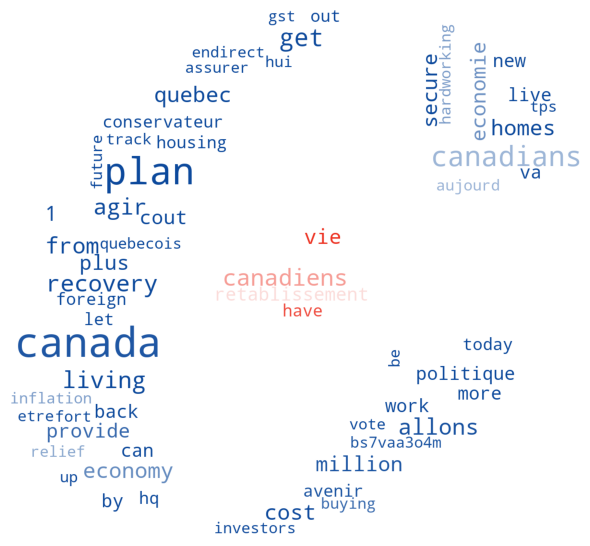

In [98]:
# Get the word count of Erin O'Toole's recent tweets
words = word_count(df_OToole_recent.text, tf_vectorizer_OToole)

# Load image of Conservative Party of Canada (CPC) Logo
cpc_mask = np.array(Image.open("cpc_logo.jpg"))

# Use colors from the CPC party logo
image_colors = ImageColorGenerator(cpc_mask)

# Generate word cloud
words_dict = words.set_index('words')['count'].to_dict()
wordcloud = WordCloud(width = 1000, height = 1000, 
                background_color ='white', 
                mask=cpc_mask,
                min_font_size = 1).fit_words(words_dict) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud.recolor(color_func=image_colors)) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

# save the WordCloud image
timestamp = dt.now().strftime("%Y%m%d_%H-%M-%S")
plt.savefig(timestamp + "_Erin_OToole_Tweets.png", dpi=300) 
plt.show() 

### Justin Trudeau (LPC)

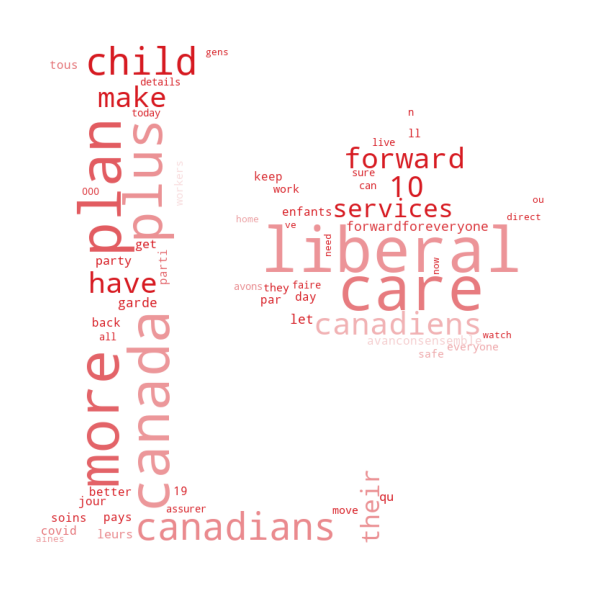

In [99]:
# Get the word count of Erin O'Toole's recent tweets
words = word_count(df_Trudeau_recent.text, tf_vectorizer_Trudeau)

# Load image of Liberal Party of Canada (LPC) Logo
lpc_mask = np.array(Image.open("lpc_logo.jpg"))

# Use colors from the LPC party logo
image_colors = ImageColorGenerator(lpc_mask)

# Generate word cloud
words_dict = words.set_index('words')['count'].to_dict()
wordcloud = WordCloud(width = 1000, height = 1000, 
                background_color ='white', 
                mask=lpc_mask,
                min_font_size = 1).fit_words(words_dict) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud.recolor(color_func=image_colors)) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

# save the WordCloud image
timestamp = dt.now().strftime("%Y%m%d_%H-%M-%S")
plt.savefig(timestamp + "_Justin_Trudeau_Tweets.png", dpi=300) 
plt.show() 